In [1]:
!pip install matplotlib

In [2]:
!pip list

Package                   Version
------------------------- ------------
absl-py                   1.4.0
aiohttp                   3.9.3
aiosignal                 1.2.0
annotated-types           0.6.0
anyio                     4.2.0
argon2-cffi               21.3.0
argon2-cffi-bindings      21.2.0
asttokens                 2.0.5
astunparse                1.6.3
async-lru                 2.0.4
async-timeout             4.0.3
attrs                     23.1.0
Babel                     2.11.0
backcall                  0.2.0
beautifulsoup4            4.12.2
bleach                    4.1.0
blinker                   1.6.2
cachetools                4.2.2
certifi                   2024.2.2
cffi                      1.16.0
charset-normalizer        2.0.4
click                     8.1.7
colorama                  0.4.6
comm                      0.2.1
contourpy                 1.2.1
cryptography              41.0.3
cycler                    0.12.1
debugpy                   1.6.7
decorator           

In [3]:
import tensorflow as tf
import os

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

In [6]:
import numpy as np
from matplotlib import pyplot as plt

In [7]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 588 files belonging to 2 classes.


In [8]:

data_iterator = data.as_numpy_iterator()

In [9]:
batch = data_iterator.next()

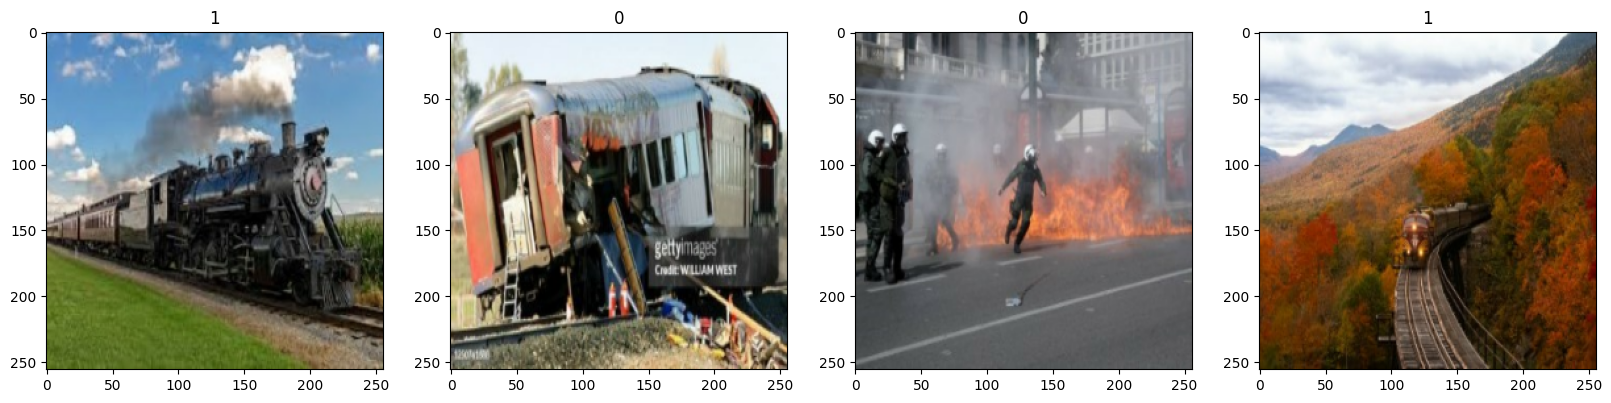

In [10]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [11]:
data = data.map(lambda x,y: (x/255, y))

In [12]:
data.as_numpy_iterator().next()

(array([[[[0.8004902 , 0.8357843 , 0.83186275],
          [0.80539215, 0.84068626, 0.8367647 ],
          [0.8102941 , 0.8455882 , 0.84166664],
          ...,
          [0.5058824 , 0.5686275 , 0.65882355],
          [0.5058824 , 0.5686275 , 0.65882355],
          [0.502451  , 0.5651961 , 0.65539217]],
 
         [[0.80525714, 0.84055126, 0.8366297 ],
          [0.8046588 , 0.8399529 , 0.8360313 ],
          [0.81322765, 0.84852177, 0.8446002 ],
          ...,
          [0.5029488 , 0.5656939 , 0.65589   ],
          [0.5029488 , 0.5656939 , 0.65589   ],
          [0.49951747, 0.56226254, 0.65245867]],
 
         [[0.81454027, 0.8498344 , 0.8459128 ],
          [0.8263069 , 0.861601  , 0.8576794 ],
          [0.7678663 , 0.8031604 , 0.79923886],
          ...,
          [0.49968597, 0.56243104, 0.65262717],
          [0.49968597, 0.56243104, 0.65262717],
          [0.4962546 , 0.5589997 , 0.6491958 ]],
 
         ...,
 
         [[0.0227338 , 0.02763576, 0.00617532],
          [0.01357

In [13]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [14]:
train_size

13

In [15]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [16]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [18]:
model = Sequential()

In [19]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [22]:
logdir='logs'

In [23]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [24]:
hist = model.fit(train, epochs=5, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/5
13/13 [==============================] - 7s 436ms/step - loss: 0.9283 - accuracy: 0.5168 - val_loss: 0.6831 - val_accuracy: 0.5312
Epoch 2/5
13/13 [==============================] - 5s 388ms/step - loss: 0.6590 - accuracy: 0.6082 - val_loss: 0.6250 - val_accuracy: 0.7292
Epoch 3/5
13/13 [==============================] - 5s 388ms/step - loss: 0.5898 - accuracy: 0.7260 - val_loss: 0.5893 - val_accuracy: 0.6771
Epoch 4/5
13/13 [==============================] - 6s 427ms/step - loss: 0.5099 - accuracy: 0.7476 - val_loss: 0.4995 - val_accuracy: 0.8333
Epoch 5/5
13/13 [==============================] - 5s 399ms/step - loss: 0.4305 - accuracy: 0.8317 - val_loss: 0.3098 - val_accuracy: 0.9062


In [28]:
!pip3 install opencv-python


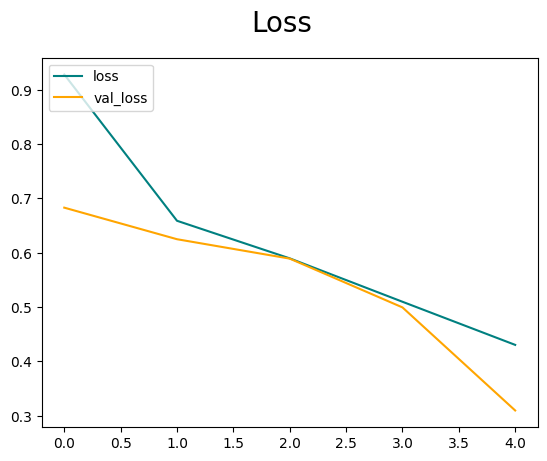

In [31]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

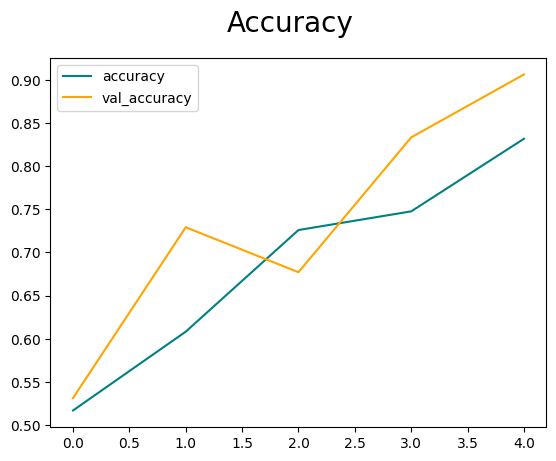

In [32]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [33]:
!pip3 install opencv-python
img = cv2.imread('1000_F_664242579_j17E0PG6WWxwrnebqu3CTPWAIQSEw34E.jpg')
plt.imshow(img)
plt.show()

NameError: name 'cv2' is not defined

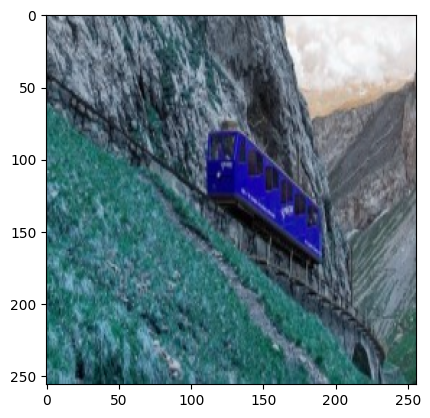

In [35]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [36]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 122ms/step


In [37]:
yhat

array([[0.49197236]], dtype=float32)

In [38]:
if yhat > 0.5: 
    print(f'No Accident')
else:
    print(f'accident')

accident


1/1 [==============================] - 0s 24ms/step


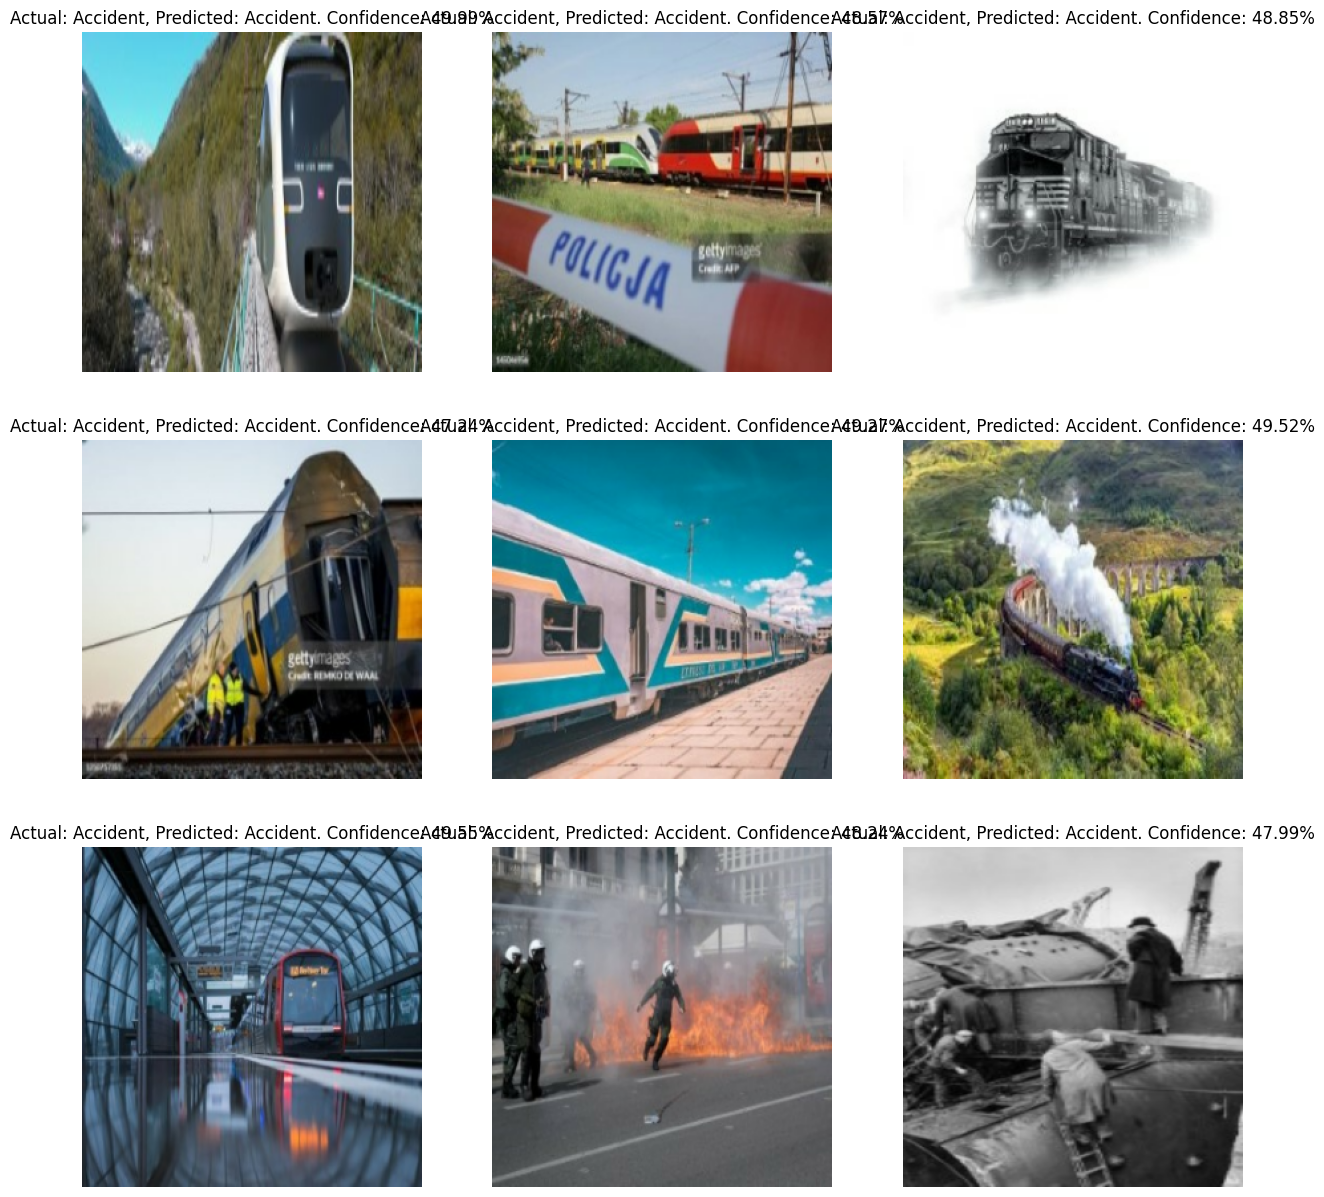

In [43]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def predict(model, img):
    img_array = tf.expand_dims(img, 0)
    predictions = model.predict(img_array)
    return predictions

class_names = ['Accident', 'No accident']
plt.figure(figsize=(15, 15))

for images, labels in test.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        # Preprocess the image
        img = tf.image.resize(images[i], (256, 256))
        img = img.numpy().astype("float32") / 255.0

        # Make predictions
        predictions = predict(model, img)
        predicted_class_index = np.argmax(predictions[0])
        predicted_class = class_names[predicted_class_index]
        confidence = round(100 * np.max(predictions[0]), 2)
        actual_class_index = np.argmax(labels[i].numpy())
        actual_class = class_names[actual_class_index]

        plt.title(f"Actual: {actual_class}, Predicted: {predicted_class}. Confidence: {confidence}%")
        plt.axis("off")

plt.show()



In [58]:

model_save_path = r'C:\Users\ASUS\Desktop\PCD\Accident Detection\API'

# Enregistrer le modèle
model.save(model_save_path)

# Confirmation de l'enregistrement
print("Modèle enregistré avec succès dans:", model_save_path)

INFO:tensorflow:Assets written to: C:\Users\ASUS\Desktop\PCD\Accident Detection\API\assets


INFO:tensorflow:Assets written to: C:\Users\ASUS\Desktop\PCD\Accident Detection\API\assets


Modèle enregistré avec succès dans: C:\Users\ASUS\Desktop\PCD\Accident Detection\API


In [59]:
import tensorflow as tf
MODEL = tf.keras.models.load_model(r'C:\Users\ASUS\Desktop\PCD\Accident Detection\API')
